<a href="https://colab.research.google.com/github/skydolphine/banking-fraud-detection/blob/main/97_f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load moduls and libraries 
import pandas as pd 
import numpy as np 
import scipy.stats as st
import seaborn as sns
import pickle
import time

from scipy.signal import lfilter

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import class_weight
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report



import matplotlib.pyplot as plt 

# supress all warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/train_imu.csv"
#df = pd.read_csv(path).iloc[:1000000]
df = pd.read_csv(path)

def filterData(samples):
  
    window = 1000# the larger n is, the smoother curve will be
    b = [1.0 / window] * window
    a = 1
    y = lfilter(b,a,samples)
    
    return y 
df_filter = df.loc[:, df.columns[:-2].tolist()].apply(filterData)
df = pd.concat([df_filter, df.datetime,df.labels], join='outer', axis=1)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Ax,Ay,Az,Gx,Gy,Gz,datetime,labels
0,1.072,16.632,1.100,-0.038,0.032,-0.061,2020-11-05 10:45:24,0
1,1.904,33.328,2.176,-0.070,0.089,-0.079,2020-11-05 10:45:24,0
2,2.812,49.872,3.124,-0.101,0.092,-0.119,2020-11-05 10:45:24,0
3,3.836,66.464,4.252,-0.120,0.143,-0.158,2020-11-05 10:45:24,0
4,4.772,82.976,5.316,-0.151,0.144,-0.196,2020-11-05 10:45:24,0
...,...,...,...,...,...,...,...,...
2180486,8638.360,-2158.181,216.551,-49.597,28.703,-55.410,2020-11-11 10:38:48,0
2180487,8645.012,-2156.813,238.395,-49.998,28.813,-55.083,2020-11-11 10:38:49,0
2180488,8653.192,-2154.809,262.223,-50.024,29.112,-54.961,2020-11-11 10:38:49,0
2180489,8667.888,-2154.433,285.491,-49.652,29.021,-54.639,2020-11-11 10:38:49,0


In [ ]:


# df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.set_index('datetime')
# df = df.resample('S').median()
# df=df.dropna(axis=0)
# df=df.sample(frac=1)

# X=df.iloc[:,0:6]
# y=df["labels"].values

# #X_transformed=QuantileTransformer(output_distribution='normal').fit_transform(X)
# X_transformed = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
# X_transformed=pd.DataFrame(X_transformed)

# n=300000
# X_transformed1=X_transformed[:n]
# X_transformed2=X_transformed[n:]
# y1=y[:n]
# y2=y[n:]



In [ ]:

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.resample('S').median()
df=df.dropna(axis=0)


X=df.iloc[:,0:6]
y=df["labels"].values
y=pd.DataFrame(y)

X_transformed = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
df=pd.DataFrame(X_transformed)
df=pd.concat([df,y],axis=1)

n=300000
train=df[:n]
test=df[n:]

train=train.sample(frac=1)
#test=test.sample(frac=1)


Xtrain=train.iloc[:,0:6]
ytrain=train.iloc[:,-1].values

Xtest=test.iloc[:,0:6]
ytest=test.iloc[:,-1].values


In [ ]:

# df['datetime'] = pd.to_datetime(df['datetime'])
# df = df.set_index('datetime')
# df = df.resample('S').median()
# df=df.dropna(axis=0)


# n=300000
# train=df[:n]
# test=df[n:]

# train=train.sample(frac=1)
# #test=test.sample(frac=1)


# Xtrain=train.iloc[:,0:6]
# ytrain=train["labels"].values

# Xtest=test.iloc[:,0:6]
# ytest=test["labels"].values


In [ ]:
model=ExtraTreesClassifier()
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))


[[147278  11982    311      0]
 [ 35940  14861    217      0]
 [  2594    912     88      0]
 [   185     84      0      0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85    159571
         1.0       0.53      0.29      0.38     51018
         2.0       0.14      0.02      0.04      3594
         4.0       0.00      0.00      0.00       269

    accuracy                           0.76    214452
   macro avg       0.37      0.31      0.32    214452
weighted avg       0.72      0.76      0.72    214452



In [ ]:
model=ExtraTreesClassifier()
model.fit(X_transformed1,y1)


predictions = model.predict(X_transformed2)

print(accuracy_score(y2, predictions))
print(confusion_matrix(y2, predictions))
print(classification_report(y2, predictions))
f_score = f1_score(y2, predictions, average = 'macro')
print("f1:",f_score)

In [ ]:
# save the model to disk
filename = 'extra_tree_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
ignore 下面的code

In [ ]:
from sklearn import datasets
from sklearn.datasets import load_digits
digits = load_digits()
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target



X=pd.DataFrame(X)
y=pd.DataFrame(y)
df=pd.concat([X,y],axis=1)
df=df.sample(frac=1)
df





n=80
train=df[:n]
test=df[n:]

train=train.sample(frac=1)
#test=test.sample(frac=1)


Xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1:].values

Xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1:].values
model=ExtraTreesClassifier()
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))



In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.resample('S').median()
df=df.dropna(axis=0)
df=df.sample(frac=1)

X=df.iloc[:,0:6]
y=df["labels"].values

#X_transformed=QuantileTransformer(output_distribution='normal').fit_transform(X)
X_transformed = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_transformed=pd.DataFrame(X_transformed)

n=300000
X_transformed1=X_transformed[:n]
X_transformed2=X_transformed[n:]
y1=y[:n]
y2=y[n:]



In [ ]:
model=ExtraTreesClassifier()
#model=KNeighborsClassifier()
#model=RandomForestClassifier()

model.fit(X_transformed1,y1)

# predictions = model.predict(testX)
# print(accuracy_score(testy, predictions))
# print(confusion_matrix(testy, predictions))
# print(classification_report(testy, predictions))
# f_score = f1_score(testy, predictions, average = 'macro')
# print("f1:",f_score)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
predictions = model.predict(X_transformed2)

print(accuracy_score(y2, predictions))
print(confusion_matrix(y2, predictions))
print(classification_report(y2, predictions))
f_score = f1_score(y2, predictions, average = 'macro')
print("f1:",f_score)

ValueError: ignored

In [ ]:
start_time = time.time()
elapsed_time = time.time() - start_time
print("Elapsed time : ", elapsed_time)

# save the model to disk
filename = 'extratree4_model.pkl'
pickle.dump(model, open(filename, 'wb'))


# take the best estimator 
#best_estimator = model.best_estimator_
# determine the f1-score 
# y_pred = best_estimator.predict(X_val_transform)
# f_score = f1_score(y_val, y_pred, average = 'macro')
# print("f1_score: ", f_score)

Elapsed time :  8.344650268554688e-05


In [ ]:
from sklearn import datasets
iris = datasets.load_wine()

X = iris.data  # we only take the first two features.
y = iris.target
X_transformed = MinMaxScaler(feature_range=(0,1)).fit_transform(X)

n=100
X_transformed1=X_transformed[:n]
X_transformed2=X_transformed[n:]
y1=y[:n]
y2=y[n:]

In [ ]:
y.shuffle

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
trainX, testX, trainy, testy = train_test_split(X_transformed1, y1, test_size=0.2)

model=ExtraTreesClassifier()
#model=RandomForestClassifier()

model.fit(trainX,trainy)

predictions = model.predict(testX)
print(accuracy_score(testy, predictions))
print(confusion_matrix(testy, predictions))
print(classification_report(testy, predictions))
f_score = f1_score(testy, predictions, average = 'macro')
print("f1:",f_score)

1.0
[[11  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

f1: 1.0


In [ ]:
testy

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
y2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
path="/content/drive/My Drive/train_imu.csv"
df = pd.read_csv(path)
df=df.iloc[1304860:,:-1]
df

,Ax,Ay,Az,Gx,Gy,Gz,datetime
1304860,8892,3272,-12428,-92,27,-53,2020-11-07 20:13:02
1304861,8960,2988,-11724,83,-33,-70,2020-11-07 20:13:03
1304862,9036,3244,-12252,-182,45,-87,2020-11-07 20:13:03
1304863,9104,2656,-12304,-14,3,-38,2020-11-07 20:13:04
1304864,9052,2508,-12296,11,16,-31,2020-11-07 20:13:04
...,...,...,...,...,...,...,...
2180486,14788,344,8888,-36,14,-37,2020-11-11 10:38:48
2180487,14644,364,8840,-34,13,-37,2020-11-11 10:38:49
2180488,14732,380,8852,-36,13,-35,2020-11-11 10:38:49
2180489,14772,408,8904,-34,15,-38,2020-11-11 10:38:49


In [ ]:
def filterData(samples):
    """
    Apply low pass filter to samples 
    
    Input: 
          sample:  numpy 1-D array 
    Return:
         y: filtered datat 1-D numpy array 
          
    """
    
    window = 1000# the larger n is, the smoother curve will be
    b = [1.0 / window] * window
    a = 1
    y = lfilter(b,a,samples)
    
    return y 



# apply filter to dataframe and store it in a new dataframe df_filter
df_filter = df.loc[:, df.columns[:-1].tolist()].apply(filterData)


# merge all dataframe in order to containe filter and non-filtered smaples 
df = pd.concat([df_filter, df.datetime], join='outer', axis=1)

del(df_filter)
df

,Ax,Ay,Az,Gx,Gy,Gz,datetime
1304860,8.892,3.272,-12.428,-0.092,0.027,-0.053,2020-11-07 20:13:02
1304861,17.852,6.260,-24.152,-0.009,-0.006,-0.123,2020-11-07 20:13:03
1304862,26.888,9.504,-36.404,-0.191,0.039,-0.210,2020-11-07 20:13:03
1304863,35.992,12.160,-48.708,-0.205,0.042,-0.248,2020-11-07 20:13:04
1304864,45.044,14.668,-61.004,-0.194,0.058,-0.279,2020-11-07 20:13:04
...,...,...,...,...,...,...,...
2180486,8638.360,-2158.181,216.551,-49.597,28.703,-55.410,2020-11-11 10:38:48
2180487,8645.012,-2156.813,238.395,-49.998,28.813,-55.083,2020-11-11 10:38:49
2180488,8653.192,-2154.809,262.223,-50.024,29.112,-54.961,2020-11-11 10:38:49
2180489,8667.888,-2154.433,285.491,-49.652,29.021,-54.639,2020-11-11 10:38:49


In [ ]:
def process_raw_data(dataset):
    X=dataset.iloc[:,0:6]
    # #scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
    df=pd.DataFrame(X,columns=X.columns)
    df=pd.concat([dataset.datetime,df],axis=1)
    df['vector'] = [[Ax,Ay,Az,Gx,Gy,Gz]for Ax,Ay,Az,Gx,Gy,Gz in zip(df.Ax, df.Ay,df.Az,df.Gx,df.Gy,df.Gz)]
    df=pd.concat([dataset.datetime,df.vector],axis=1)
    df = df.groupby('datetime')["vector"].apply(list)
    # label_df = df.groupby('datetime')["labels"].first()
    df=pd.DataFrame(df)
    df["vector"]=df["vector"].apply(lambda x: np.array(x))
    df["vector"]=df["vector"].apply(lambda x: x.mean(axis=0))                  #method 3 - mean value vector
    return df

df=process_raw_data(df)
df

,vector
datetime,
2020-11-07 20:13:02,"[8.892, 3.2720000000000002, -12.428, -0.092, 0..."
2020-11-07 20:13:03,"[22.369999999999997, 7.882, -30.27800000000000..."
2020-11-07 20:13:04,"[44.970666666666666, 14.427999999999999, -61.0..."
2020-11-07 20:13:05,"[76.565, 22.519, -103.787, -0.25025, 0.12775, ..."
2020-11-07 20:13:06,"[107.80533333333334, 32.24666666666666, -146.9..."
...,...
2020-11-11 10:38:45,"[8589.096000000001, -2176.0709999999995, 50.80..."
2020-11-11 10:38:46,"[8600.160000000003, -2172.8869999999997, 93.01..."
2020-11-11 10:38:47,"[8614.128000000004, -2166.5703333333327, 147.0..."


In [ ]:
X=df["vector"]


X=np.concatenate(X.values).reshape(len(X),max_row,6)

X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])

#X_transformed=QuantileTransformer(output_distribution='normal').fit_transform(X)
X_transformed2 = MinMaxScaler(feature_range=(0,1)).fit_transform(X)



In [ ]:

predictions = model.predict(X_transformed2)


print(accuracy_score(t, predictions))
print(confusion_matrix(t, predictions))
print(classification_report(t, predictions))
f_score = f1_score(t, predictions, average = 'macro')
print("f1:",f_score)

0.7314488321530827
[[225069     54      0      0]
 [ 76081      0      0      0]
 [  6041      0      0      0]
 [   458      0      0      0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84    225123
           1       0.00      0.00      0.00     76081
           2       0.00      0.00      0.00      6041
           4       0.00      0.00      0.00       458

    accuracy                           0.73    307703
   macro avg       0.18      0.25      0.21    307703
weighted avg       0.54      0.73      0.62    307703

f1: 0.21122450128760523


(array([498140.,      0.,      0.,      0.,      0.,   4730.,      0.,
             0.,      0.,    572.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

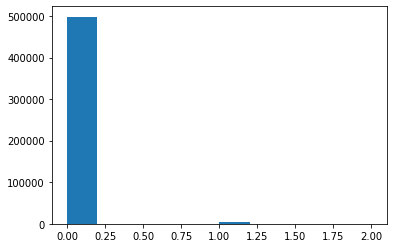